<a href="https://colab.research.google.com/github/Harshvardhan-10/qrng-adversarial-testing/blob/main/xorshift_qrng_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner

In [ ]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import datetime
import pandas as pd

## Extract training history for loaded model

In [ ]:
history_loaded = loaded_model.history

AttributeError: 'Sequential' object has no attribute 'history'

## Plot accuracy for loaded model

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy values
train_accuracy_loaded = history_loaded.history['binary_accuracy']
val_accuracy_loaded = history_loaded.history['val_binary_accuracy']

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy_loaded, label='Training Accuracy')
plt.plot(val_accuracy_loaded, label='Validation Accuracy')
plt.title('Loaded Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make predictions with loaded model

In [ ]:
y_pred_loaded = loaded_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Compare loaded model predictions to actuals

In [ ]:
y_pred_binary_loaded = (y_pred_loaded > 0.5).astype(int)
print("Shape of loaded model binary predictions:", y_pred_binary_loaded.shape)
print("Shape of actual test labels:", y_test.shape)

Shape of loaded model binary predictions: (10000, 32)
Shape of actual test labels: (10000, 32)


## Calculate bit-wise accuracy for loaded model

In [ ]:
correct_predictions_per_bit_loaded = np.sum(y_pred_binary_loaded == y_test, axis=0)
bit_wise_accuracy_loaded = correct_predictions_per_bit_loaded / y_test.shape[0]
print("Loaded model bit-wise accuracy:", bit_wise_accuracy_loaded)

Loaded model bit-wise accuracy: [1.     0.9999 1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     0.681  1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.    ]


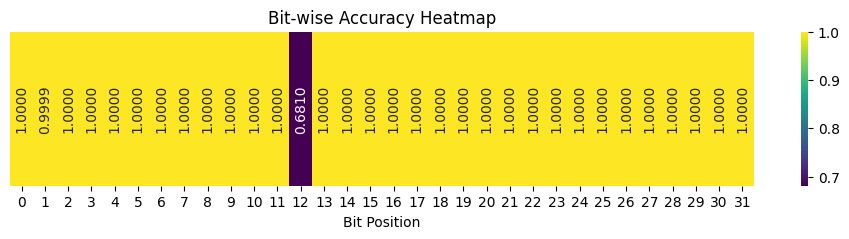

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 2))
sns.heatmap(bit_wise_accuracy_loaded.reshape(1, -1), annot=True, cmap='viridis', fmt=".4f", yticklabels=False, annot_kws={'rotation': 90})
plt.title('Bit-wise Accuracy Heatmap')
plt.xlabel('Bit Position')
plt.show()

## Display bit-wise accuracy for loaded model

In [ ]:
bit_accuracy_df_loaded = pd.DataFrame({
    'Bit Position': np.arange(BIT_WIDTH),
    'Accuracy': bit_wise_accuracy_loaded
})
display(bit_accuracy_df_loaded)

,Bit Position,Accuracy
0,0,1.0000
1,1,0.9999
2,2,1.0000
3,3,1.0000
4,4,1.0000
5,5,1.0000
6,6,1.0000
7,7,1.0000
8,8,1.0000
9,9,1.0000


# B

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# XORshift

In [ ]:
IMPORT_COUNT = 1990000
TEST_COUNT = 10000

In [ ]:
# Generate random seed
#myrand=np.random.randint(1, 99999 + 1)
myrand=71926
np.random.seed(myrand)
tf.random.set_seed(myrand)
print("Random seed is:",myrand)

Random seed is: 71926


In [ ]:
PREVIOUS_TIMESTEP_COUNT = 4
TOTAL_DATA_NUM = IMPORT_COUNT-PREVIOUS_TIMESTEP_COUNT

In [ ]:
# convert the sequence of generated numbers to 4 inputs and one output
def strided(a, L):
	shp = a.shape
	s  = a.strides
	nd0 = shp[0]-L+1
	shp_in = (nd0,L)+shp[1:]
	strd_in = (s[0],) + s
	return np.lib.stride_tricks.as_strided(a, shape=shp_in, strides=strd_in)

In [ ]:
RNG_OUTPUT_FILENAME="xorshift128.txt"
df = np.genfromtxt(RNG_OUTPUT_FILENAME,delimiter='\n',dtype='uint64')[:IMPORT_COUNT]

In [ ]:
# calculates how many bits are in the output.
BIT_WIDTH = np.ceil(np.log2(np.amax(df))).astype(int)

In [ ]:
print(BIT_WIDTH)

32


In [ ]:
print(df.shape)

(1990000,)


In [ ]:
# convert the generated numbers to binary sequences
df_as_bits =(df[:,None] & (1 << np.arange(BIT_WIDTH,dtype='uint64')) > 0).astype(int)
df_as_frames = strided(df_as_bits, PREVIOUS_TIMESTEP_COUNT+1)

In [ ]:
print(df_as_bits[0])
print(df_as_frames[0])

[0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1]
[[0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1]
 [0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0]
 [0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1]
 [0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1]
 [0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0]]


In [ ]:
indicies = np.arange(TOTAL_DATA_NUM,dtype='uint64')
np.random.shuffle(indicies)
df_as_frames=df_as_frames[indicies]

In [ ]:
# convert the data into inputs and outputs
y = df_as_frames[:,-1,:]
X = df_as_frames[:,:-1,]
X = X.reshape([X.shape[0], X.shape[1]*X.shape[2]])

In [ ]:
# Convert the data into train and test data
X_train = X[TEST_COUNT:]
X_test = X[:TEST_COUNT]
y_train = y[TEST_COUNT:]
y_test = y[:TEST_COUNT]

In [ ]:
def build_model(hp):
	LOSS="binary_crossentropy"
	model = Sequential()
	model.add(Dense(1024, activation='relu',input_shape=[X.shape[1]] ))
	model.add(Dense(y.shape[1], activation='sigmoid'))
	opt = keras.optimizers.Nadam(
		learning_rate=hp.Float("learning_rate", 10**(-5), 10**(-3),sampling="log"),
		epsilon=hp.Float("epsilon",1e-7,1e-5,sampling="log"),
		beta_1=hp.Float("beta_1",.8,.9,sampling="reverse_log"),
		beta_2=hp.Float("beta_2",.8,.9,sampling="reverse_log"),
		)
	model.compile(optimizer=opt, loss=LOSS,metrics=['binary_accuracy'])
	return model

In [ ]:
# extract a short set from the training for hyper parameter tuning
X_train_short= X_train[:600000]
y_train_short= y_train[:600000]

In [ ]:
# use the best model for training
# model = tuner.hypermodel.build(best_hps)
# best_hps.values

# Build the model directly with basic parameters
LOSS = "binary_crossentropy"
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=[X.shape[1]]))
model.add(Dense(y.shape[1], activation='sigmoid'))
opt = keras.optimizers.Nadam(
    learning_rate=0.0003826518055596723,  # Example learning rate
    epsilon=6.396190758353597e-07,         # Example epsilon
    beta_1=0.85,           # Example beta_1
    beta_2=0.88          # Example beta_2
)
model.compile(optimizer=opt, loss=LOSS, metrics=['binary_accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def train_model(model, X, Y, epochs=10, batch_size=512, log_dir = "dense_model/"):
    log_dir += datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,profile_batch=0)
    model.fit(X, Y, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size,callbacks=[tensorboard_callback],verbose=1)
    return model

In [ ]:
%%time
my_model_trained = train_model(model, epochs=100)

Epoch 1/100
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - binary_accuracy: 0.5088 - loss: 0.6915 - val_binary_accuracy: 0.5987 - val_loss: 0.6287
Epoch 2/100
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - binary_accuracy: 0.6111 - loss: 0.5889 - val_binary_accuracy: 0.6241 - val_loss: 0.5217
Epoch 3/100
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - binary_accuracy: 0.6255 - loss: 0.5208 - val_binary_accuracy: 0.6263 - val_loss: 0.5197
Epoch 4/100
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - binary_accuracy: 0.6288 - loss: 0.5191 - val_binary_accuracy: 0.6327 - val_loss: 0.5134
Epoch 5/100
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - binary_accuracy: 0.6433 - loss: 0.5092 - val_binary_accuracy: 0.6544 - val_loss: 0.4914
Epoch 6/100
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - binary_accuracy: 0.6594 - loss: 0.4851 - val_binary_accuracy: 0.6674 - val_loss: 0.4689
Epoch 7/100
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - binary_accuracy: 0.6741 - loss: 0.4637 - val_binary_accuracy: 0.67

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=256)
print("test loss: %f, test acc: %s" % tuple(results))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - binary_accuracy: 0.9900 - loss: 0.0185
test loss: 0.018533, test acc: 0.9900281429290771


In [ ]:
my_model_trained.save("xorshift128_model.h5")

In [ ]:
my_model_trained.save("xorshift128_model.keras")

# Numpy Random

In [ ]:
def preprocess_data(filename, import_count, test_count, previous_timestep_count, bit_width):
    """
    Loads data from a file, preprocesses it, and returns training and testing sets.

    Args:
        filename (str): The path to the data file.
        import_count (int): The number of data points to import.
        test_count (int): The number of data points to use for testing.
        previous_timestep_count (int): The number of previous timesteps to use as input.
        bit_width (int): The number of bits in each data point.

    Returns:
        tuple: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Load the data
    df = np.genfromtxt(filename, delimiter='\n', dtype='uint64')[:import_count]

    # convert the generated numbers to binary sequences
    df_as_bits = (df[:, None] & (1 << np.arange(bit_width, dtype='uint64')) > 0).astype(int)

    # convert the sequence of generated numbers to inputs and outputs using striding
    df_as_frames = strided(df_as_bits, previous_timestep_count + 1)

    # Shuffle the data
    total_data_num = import_count - previous_timestep_count
    indicies = np.arange(total_data_num, dtype='uint64')
    np.random.shuffle(indicies)
    df_as_frames = df_as_frames[indicies]

    # convert the data into inputs and outputs
    y = df_as_frames[:, -1, :]
    X = df_as_frames[:, :-1, ]
    X = X.reshape([X.shape[0], X.shape[1] * X.shape[2]])

    # Convert the data into train and test data
    X_train = X[test_count:]
    X_test = X[:test_count]
    y_train = y[test_count:]
    y_test = y[:test_count]

    return X_train, X_test, y_train, y_test

In [ ]:
# Example of how to use the function:
RNG_OUTPUT_FILENAME="prng_64M_decimals.txt"
IMPORT_COUNT = 1990000
TEST_COUNT = 10000
PREVIOUS_TIMESTEP_COUNT = 4
BIT_WIDTH = 32 # Make sure this is calculated correctly earlier

X_train, X_test, y_train, y_test = preprocess_data(
    RNG_OUTPUT_FILENAME,
    IMPORT_COUNT,
    TEST_COUNT,
    PREVIOUS_TIMESTEP_COUNT,
    BIT_WIDTH
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1979996, 128)
X_test shape: (10000, 128)
y_train shape: (1979996, 32)
y_test shape: (10000, 32)


In [ ]:
LOSS = "binary_crossentropy"
model_np = Sequential()
model_np.add(Dense(1024, activation='relu', input_shape=[X_train.shape[1]]))
model_np.add(Dense(y_train.shape[1], activation='sigmoid'))
opt = keras.optimizers.Nadam(
    learning_rate=0.00038,  # Example learning rate
    epsilon=6.396e-07,         # Example epsilon
    beta_1=0.85,           # Example beta_1
    beta_2=0.88          # Example beta_2
)
model_np.compile(optimizer=opt, loss=LOSS, metrics=['binary_accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
%%time
my_model_trained_np = train_model(model_np, X_train, y_train, epochs=50)

Epoch 1/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - binary_accuracy: 0.4998 - loss: 0.6939 - val_binary_accuracy: 0.5013 - val_loss: 0.6931
Epoch 2/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - binary_accuracy: 0.5011 - loss: 0.6931 - val_binary_accuracy: 0.5011 - val_loss: 0.6932
Epoch 3/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - binary_accuracy: 0.5026 - loss: 0.6931 - val_binary_accuracy: 0.5007 - val_loss: 0.6932
Epoch 4/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - binary_accuracy: 0.5047 - loss: 0.6930 - val_binary_accuracy: 0.5003 - val_loss: 0.6932
Epoch 5/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - binary_accuracy: 0.5067 - loss: 0.6930 - val_binary_accuracy: 0.5000 - val_loss: 0.6933
Epoch 6/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - binary_accuracy: 0.5086 - loss: 0.6929 - val_binary_accuracy: 0.4993 - val_loss: 0.6934
Epoch 7/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - binary_accuracy: 0.5104 - loss: 0.6927 - val_binary_accuracy: 0.4989 - va

In [ ]:
%%time
my_model_trained_np = train_model(my_model_trained_np, X_train, y_train, epochs=50)

Epoch 1/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - binary_accuracy: 0.5230 - loss: 0.6910 - val_binary_accuracy: 0.5012 - val_loss: 0.6960
Epoch 2/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - binary_accuracy: 0.5230 - loss: 0.6910 - val_binary_accuracy: 0.5012 - val_loss: 0.6960
Epoch 3/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - binary_accuracy: 0.5230 - loss: 0.6910 - val_binary_accuracy: 0.5014 - val_loss: 0.6960
Epoch 4/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - binary_accuracy: 0.5230 - loss: 0.6910 - val_binary_accuracy: 0.5013 - val_loss: 0.6961
Epoch 5/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - binary_accuracy: 0.5230 - loss: 0.6910 - val_binary_accuracy: 0.5008 - val_loss: 0.6961
Epoch 6/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - binary_accuracy: 0.5230 - loss: 0.6910 - val_binary_accuracy: 0.5012 - val_loss: 0.6961
Epoch 7/50
3868/3868 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - binary_accuracy: 0.5230 - loss: 0.6910 - val_binary_accuracy: 0.5013 - va

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("xorshift128_model.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 11 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Task
Plot the training and validation accuracy from the training history, and calculate and display the bit-wise accuracy of the model's predictions on the test set.

## Extract training history

### Subtask:
Get the training history from the trained model.


**Reasoning**:
Access the training history from the trained model.



In [ ]:
history_np = my_model_trained_np.history

## Plot accuracy

### Subtask:
Plot the training and validation accuracy over epochs.


**Reasoning**:
Extract the training and validation accuracy from the history and plot them over epochs.



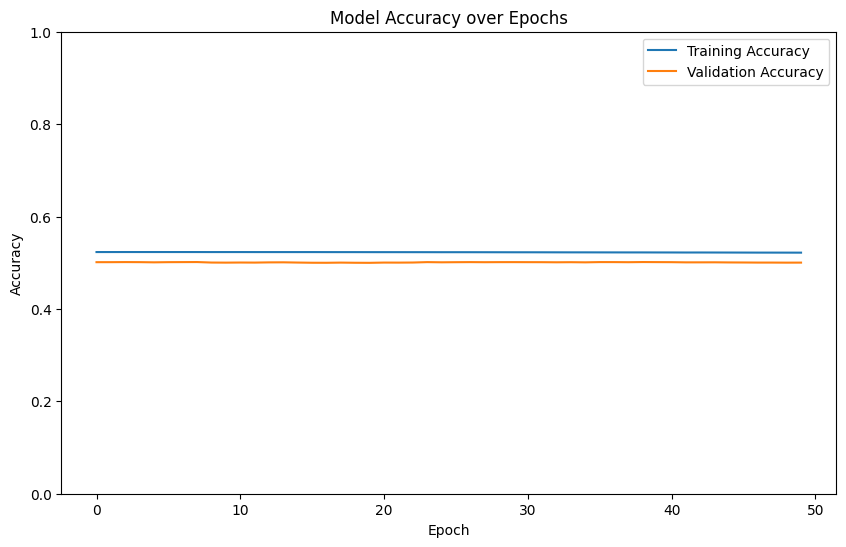

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy values
train_accuracy = history_np.history['binary_accuracy']
val_accuracy = history_np.history['val_binary_accuracy']

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.ylim(0,1)
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make predictions

### Subtask:
Use the trained model to make predictions on the test set.


**Reasoning**:
Use the trained model to make predictions on the test set.



In [ ]:
y_pred = my_model_trained_np.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Compare predictions to actuals

### Subtask:
Compare the predicted bits to the actual bits in the test set.


**Reasoning**:
Convert the predicted probabilities to binary predictions and ensure the shape matches the actual test labels.



In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)
print("Shape of binary predictions:", y_pred_binary.shape)
print("Shape of actual test labels:", y_test.shape)

Shape of binary predictions: (10000, 32)
Shape of actual test labels: (10000, 32)


## Calculate bit-wise accuracy

### Subtask:
Calculate the accuracy for each bit position.


**Reasoning**:
Calculate the number of correct predictions for each bit position and then calculate the accuracy for each bit position.



In [ ]:
correct_predictions_per_bit = np.sum(y_pred_binary == y_test, axis=0)
bit_wise_accuracy = correct_predictions_per_bit / y_test.shape[0]
print("Bit-wise accuracy:", bit_wise_accuracy)

Bit-wise accuracy: [0.4972 0.4992 0.5014 0.5022 0.5156 0.4955 0.4976 0.4994 0.505  0.4962
 0.5087 0.5028 0.4977 0.5048 0.4985 0.4963 0.503  0.5046 0.5032 0.4901
 0.5003 0.501  0.4972 0.5011 0.4961 0.497  0.5007 0.4947 0.5    0.5025
 0.506  0.4922]


## Display bit-wise accuracy

### Subtask:
Show the accuracy for each bit, perhaps in a table or as a percentage.


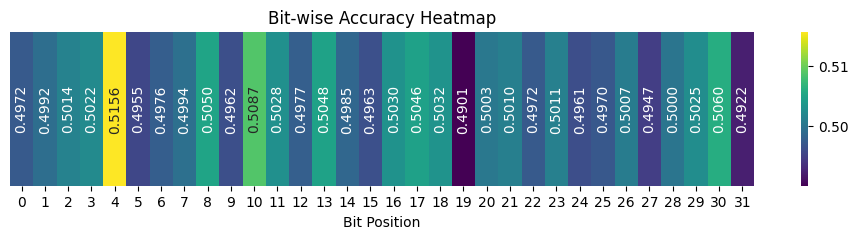

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 2))
sns.heatmap(bit_wise_accuracy.reshape(1, -1), annot=True, cmap='viridis', fmt=".4f", yticklabels=False, annot_kws={'rotation': 90})
plt.title('Bit-wise Accuracy Heatmap')
plt.xlabel('Bit Position')
plt.show()

**Reasoning**:
Create a pandas DataFrame to display the bit-wise accuracy with appropriate column names and then print it.



In [ ]:
bit_accuracy_df = pd.DataFrame({
    'Bit Position': np.arange(BIT_WIDTH),
    'Accuracy': bit_wise_accuracy
})
display(bit_accuracy_df)

,Bit Position,Accuracy
0,0,0.4972
1,1,0.4992
2,2,0.5014
3,3,0.5022
4,4,0.5156
5,5,0.4955
6,6,0.4976
7,7,0.4994
8,8,0.5050
9,9,0.4962


## Summary:

### Data Analysis Key Findings

*   The training and validation accuracy were successfully plotted over epochs, showing the performance trend during training.
*   The model's bit-wise accuracy on the test set varied across the 32 bit positions, ranging from approximately 0.4901 to 0.5156.
*   The average bit-wise accuracy on the test set appears to be around 0.50, indicating that the model's prediction performance for individual bits is close to random chance for many positions.
*   The bit-wise accuracy for each position was successfully displayed in a table format.

### Insights or Next Steps

*   The near-random bit-wise accuracy suggests the model is not effectively learning the patterns required to predict individual bits correctly. Further model architecture review, hyperparameter tuning, or feature engineering might be necessary.
*   Investigating the distribution of the training data and target labels could provide insights into why the model struggles with predicting individual bits.
